# Regression analysis: Emissions & Population

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [4]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_without_0_emissions_with_extreme_outliers.csv'), index_col = False)


# Data cleaning

In [5]:
df_all.shape

(4536, 14)

In [6]:
df_all.head()

,Unnamed: 0.1,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,GDP per cap. category,Country category by emissions
0,0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
1,1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
2,2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
3,3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,High GDP per cap.,Low emissions country
4,4,4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN,2373000.0,NaN,Insignificant emissions country


In [7]:
#Changing data type of 'Year'
df_all['Year'] = df_all['Year'].astype('str')

In [8]:
#Deleting column 'Unnnamed: 0'

df_all = df_all.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])


In [9]:
#Missing values
df_all.isnull().sum()

Country                             0
Year                                0
Type of emissions                   0
Gas type                            0
Emissions quantity, tonnes          0
Total population, thousands       126
Population density                126
GDP per capita                    420
WMG                              2997
Emissions by year & country         0
GDP per cap. category             420
Country category by emissions       0
dtype: int64

In [10]:
df_all.dropna(subset=['Total population, thousands'], inplace=True)


### Hypothesis: If the number of population grows (independent variable), then the emissions quantity grows as well (dependent variable). 

# Data prep for regression analysis

Text(0.5, 1.0, 'Correlation Emissions / Population')

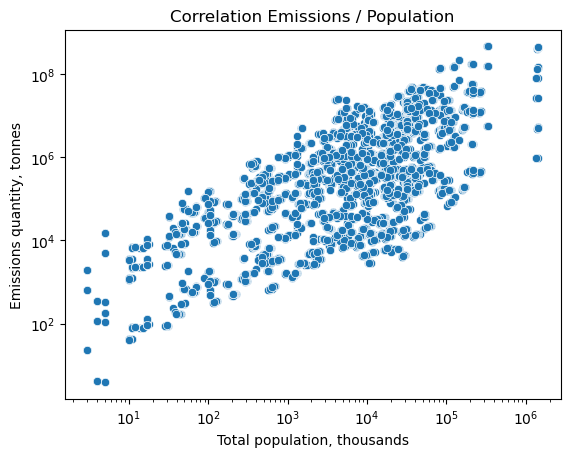

In [12]:
#create a scatterplot with log scale on both axes
sns.scatterplot(data=df_all, x='Total population, thousands', y='Emissions quantity, tonnes')
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation Emissions / Population')

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_all['Total population, thousands'].values.reshape(-1,1)
y = df_all['Emissions quantity, tonnes'].values.reshape(-1,1)

In [14]:
X

array([[1.050000e+02],
       [1.050000e+02],
       [1.050000e+02],
       ...,
       [1.338636e+06],
       [1.338636e+06],
       [7.493000e+03]])

In [15]:
y

array([[4.8700000e+02],
       [1.3636000e+04],
       [4.0908000e+04],
       ...,
       [9.4004700e+05],
       [7.8963948e+07],
       [3.1235400e+06]])

In [16]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [17]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

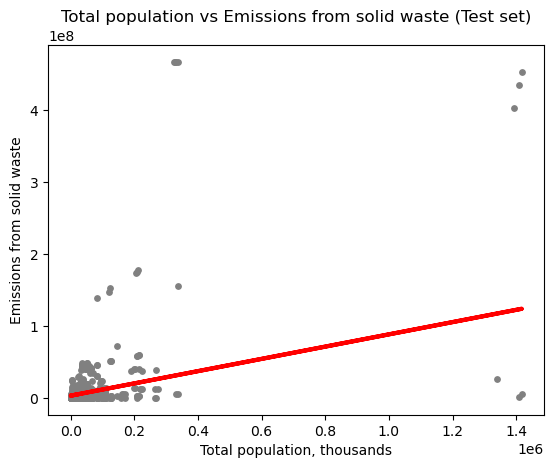

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total population vs Emissions from solid waste (Test set)')
plot_test.xlabel('Total population, thousands')
plot_test.ylabel('Emissions from solid waste')
plot_test.show()

## The line does not cover all data points, in fact only a few in the lower left corner. 

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[85.10667168]]
Mean squared error:  986773061755846.5
R2 score:  0.21627788127350833


In [23]:
y_predicted

array([[4844331.66813035],
       [3578795.46026481],
       [4082031.20990226],
       ...,
       [3278794.44259661],
       [3261773.10826083],
       [3331986.11239594]])

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12600.0,4.844332e+06
1,1026564.0,3.578795e+06
2,322000.0,4.082031e+06
3,521640.0,5.300759e+06
4,212000.0,5.986038e+06
5,33900.0,4.016499e+06
6,3822000.0,3.382369e+06
7,237647.0,7.535575e+06
8,1027600.0,4.603990e+06
9,13580000.0,2.003570e+07


### Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

The slope is positive which indicate a positive relationship between the variables. 
However, the RMSE is very large, which indicates that the line is too far away from the data points on average, indicating that the regression line isn’t an accurate representation of the data.
The R2 score is quite low, 0.21. 
All in all, it’s pretty clear that my model isn’t performing too well. 

Possible bias: since the data are estimates, there might be errors in the data, which can lead to inacurate analysis results. 

**________________________________________________**
# Bonus: Compare how the regression fits the training set

In [25]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[85.10667168]]
Mean squared error:  667022316757098.0
R2 score:  0.20368795113786764


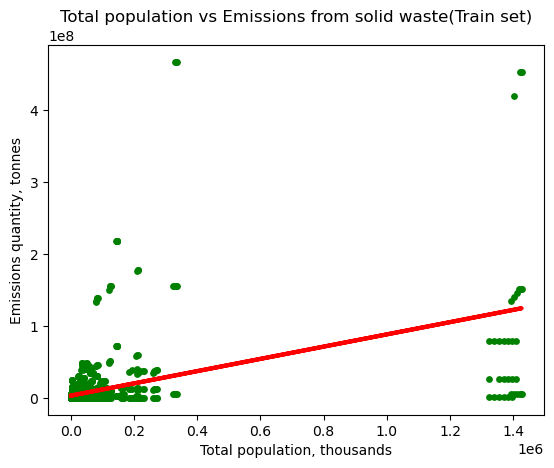

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total population vs Emissions from solid waste(Train set)')
plot_test.xlabel('Total population, thousands')
plot_test.ylabel('Emissions quantity, tonnes')
plot_test.show()

### Analysing the training set hasn't indicated that the model fits either. As well as the analysis without the outliers.



**_________________________________________________________________**


## Bonus 2 : performance improvement after removing outliers

In [29]:
df_test = df_all[df_all['Emissions quantity, tonnes'] <=36635630.977137096] 

In [30]:
df_test = df_all[df_all['Total population, thousands'] <=316731.4274845902] 

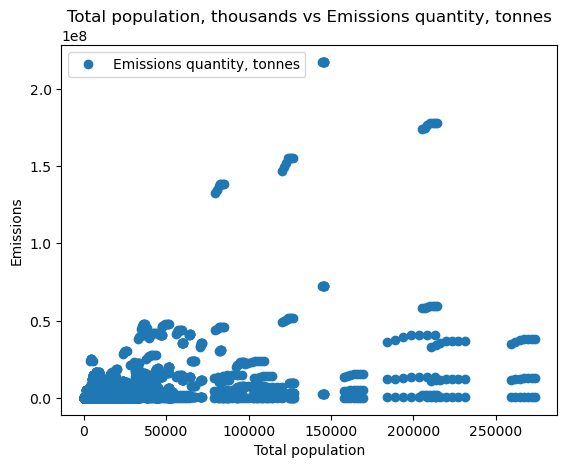

In [31]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Total population, thousands', y='Emissions quantity, tonnes', style='o')  
plt.title('Total population, thousands vs Emissions quantity, tonnes')  
plt.xlabel('Total population')  
plt.ylabel('Emissions')  
plt.show()

In [32]:
# Reshape again.

X_2 = df_test['Total population, thousands'].values.reshape(-1,1)
y_2 = df_test['Emissions quantity, tonnes'].values.reshape(-1,1)

In [33]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [34]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [35]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [36]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[180.06281788]]
Mean squared error:  150272025621889.38
R2 score:  0.21073571461446916


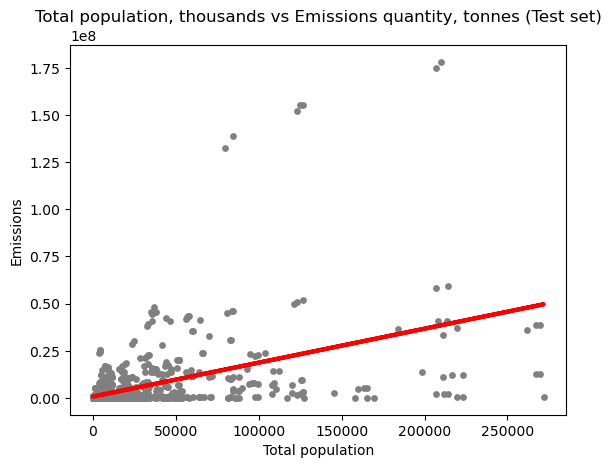

In [38]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Total population, thousands vs Emissions quantity, tonnes (Test set)')
plot_test.xlabel('Total population')
plot_test.ylabel('Emissions')
plot_test.show()

In [39]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3284400.0,1.666356e+06
1,126000.0,4.583554e+06
2,7308000.0,6.455307e+06
3,34500.0,5.409862e+06
4,380800.0,8.940669e+05
5,3444000.0,2.458093e+06
6,8022.0,7.008595e+05
7,1705200.0,1.278501e+06
8,1680.0,7.651420e+05
9,53844.0,8.002542e+05
